In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [108]:
# 데이터 로드
wine_df = pd.read_csv(r'C:\team_pj\EDA-podo-wine.git\WineQT.csv')
print(wine_df.shape)
wine_df.head()

(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [117]:
# 퀄리티를 3단계로 나눔
# 6단계로 하면 3, 8 값이 너무 부족 -> f1-score가 0
def quality_group(q):
    if q <= 4:
        return 0   # low
    elif q <= 6:
        return 1   # medium
    else:
        return 2   # high

wine_df['quality_group'] = wine_df['quality'].apply(quality_group)

In [118]:
# 입력/라벨 (3단계 분류)
X = wine_df.drop(columns=['quality', 'quality_group']).to_numpy()
y = wine_df['quality_group'].to_numpy()

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1143, 12) (1143,)
(914, 12) (914,)
(229, 12) (229,)


In [119]:
# 결측치 및 자료형 확인 - 결측치 없음            결측치 확인
print(wine_df.info())

<class 'pandas.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
 13  quality_group         1143 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 125.1 KB
None


In [120]:
# 라벨 분포 확인 - 3단계 분류 전
perch_df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [121]:
# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
wine_df['quality_group'].value_counts()

quality_group
1    945
2    159
0     39
Name: count, dtype: int64

In [124]:
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# 데이터 불균형으로 인해 low 등급은 충분히 학습되지 않음,샘플 수 부족

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.91      0.98      0.94       189
           2       0.88      0.66      0.75        32

    accuracy                           0.90       229
   macro avg       0.59      0.55      0.56       229
weighted avg       0.87      0.90      0.88       229



C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

In [125]:
param_grid = {
    'max_depth': [None, 5, 10, 15]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

cv_results_df = pd.DataFrame(grid.cv_results_)

In [126]:
cv_results_df = pd.DataFrame(grid.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007301,0.007423,0.000000,0.000000,None,{'max_depth': None},0.819672,0.797814,0.781421,0.775956,0.791209,0.793214,0.015245,4
1,0.001229,0.001004,0.000386,0.000474,5,{'max_depth': 5},0.808743,0.830601,0.825137,0.808743,0.807692,0.816183,0.009704,1
2,0.003173,0.006346,0.000000,0.000000,10,{'max_depth': 10},0.825137,0.819672,0.825137,0.786885,0.791209,0.809608,0.016961,2
3,0.009412,0.012504,0.000000,0.000000,15,{'max_depth': 15},0.819672,0.803279,0.803279,0.748634,0.791209,0.793214,0.024058,3


In [127]:
# -----------------------------
# 1. 기존 모델
# -----------------------------
rf_default = RandomForestClassifier(
    max_depth=15,
    n_estimators=50,
    random_state=42
)

rf_default.fit(X_train_scaled, y_train)
y_pred_default = rf_default.predict(X_test_scaled)

print("===== Default RandomForest =====")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))


# -----------------------------
# 2. class_weight 적용 모델
# -----------------------------
rf_balanced = RandomForestClassifier(
    max_depth=15,
    n_estimators=50,
    class_weight='balanced',
    random_state=42
)

rf_balanced.fit(X_train_scaled, y_train)
y_pred_balanced = rf_balanced.predict(X_test_scaled)

print("===== Balanced RandomForest =====")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))

===== Default RandomForest =====
Accuracy: 0.8995633187772926
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.91      0.97      0.94       189
           2       0.81      0.69      0.75        32

    accuracy                           0.90       229
   macro avg       0.58      0.55      0.56       229
weighted avg       0.87      0.90      0.88       229

===== Balanced RandomForest =====
Accuracy: 0.9039301310043668
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.91      0.98      0.94       189
           2       0.88      0.66      0.75        32

    accuracy                           0.90       229
   macro avg       0.59      0.55      0.56       229
weighted avg       0.87      0.90      0.88       229



C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Playdata\miniconda3\envs\aistudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

클래스 불균형 문제를 해결하기 위해 class_weight='balanced'를 적용했으나, 소수 클래스의 샘플 수가 매우 적어 성능 개선 효과는 미미하였다.

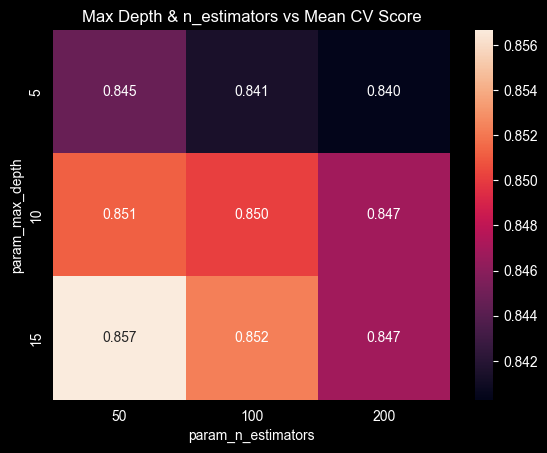

Best Params: {'max_depth': 15, 'n_estimators': 50}
Best CV Score: 0.8566804779919532


In [130]:
cv_pivot = cv_results_df.pivot_table(
    columns='param_n_estimators',
    index='param_max_depth',
    values='mean_test_score',
)

plt.figure()
sns.heatmap(cv_pivot, annot=True, fmt=".3f")
plt.title("Max Depth & n_estimators vs Mean CV Score")
plt.show()

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

RandomForest는 여러 트리의 평균을 사용하기 때문에 깊은 트리에서도 과적합이 완화되며, max_depth=15, n_estimators=50 조합에서 가장 높은 평균 교차검증 정확도(0.857)를 보였다.

In [131]:
best_model = grid.best_estimator_
print("Test Accuracy:", best_model.score(X_test_scaled, y_test))

Test Accuracy: 0.6157205240174672


In [141]:
# 2단계 라벨 생성
wine_df["quality_binary"] = (wine_df["quality"] >= 6).astype(int)

X = wine_df.drop(columns=["quality", "quality_binary"]).values
y = wine_df["quality_binary"].values

# 반드시 다시 split!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Unique labels after split:", set(y_test))

Unique labels after split: {np.int64(0), np.int64(1)}


Accuracy: 0.8122270742358079
              precision    recall  f1-score   support

           0       0.85      0.71      0.78       105
           1       0.79      0.90      0.84       124

    accuracy                           0.81       229
   macro avg       0.82      0.80      0.81       229
weighted avg       0.82      0.81      0.81       229



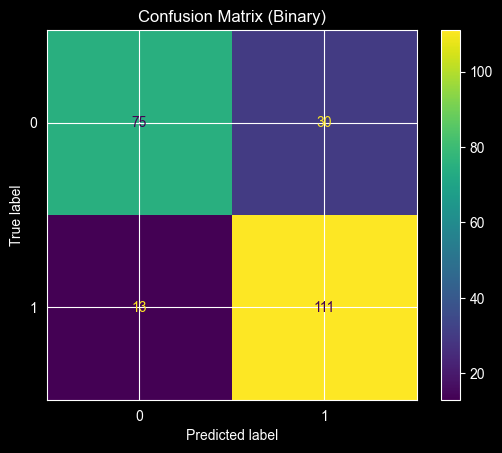

In [145]:
# 2단계 라벨 생성
# 0 = 5점 이하 / 1 = 6점 이상
wine_df["quality_binary"] = (wine_df["quality"] >= 6).astype(int)

X = wine_df.drop(columns=["quality", "quality_binary"]).values
y = wine_df["quality_binary"].values

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 학습
rf = RandomForestClassifier(
    max_depth=15,
    n_estimators=50,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

# 예측
y_pred = rf.predict(X_test_scaled)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 혼동행렬
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix (Binary)")
plt.show()

와인 품질 점수를 세 단계로 예측하는 것은 어려웠으나, 이를 2단계(좋음/보통) 이진분류로 재구성한 결과 정확도와 클래스 균형 성능이 크게 향상되었다.